# Lead Scoring Case Study
**Identification of Hot Leads to focus more on them and thus enhancing the conversion ratio**

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reading the dataset
leads=pd.read_csv('leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Data Understanding

In [4]:
# Determining the structure of the datset, missing values and datatypes
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
#Looking for statistical summary of the dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


As we can see from the above, there are 7 numerical variables columns and remaining 30 columns are having categorical variables.

## Data Cleaning and Preparation

In [6]:
# Dropping columns like 'Prospect ID','Lead Number','I agree to pay the amount through cheque' and
#'a free copy of Mastering The Interview' which are not required for analysis
drop_cols=['Lead Number','I agree to pay the amount through cheque','What matters most to you in choosing a course',
          'A free copy of Mastering The Interview']

leads=leads.drop(drop_cols,1)

Now, there are some columns/categorical variables having label as 'Select' which means the customer was not selected any option hence it is better to put it as null value - Because there was no suitable option present to select for the customer searching for. 

In [7]:
#Replacing Select values as np.nan
leads[leads.columns] = leads[leads.columns].replace('Select',np.nan)

In [8]:
#Counting columns with any NULL values
round((leads.isnull().sum()/len(leads.index))*100,2)

Prospect ID                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                   26.63
Specialization                            36.58
How did you hear about X Education        78.46
What is your current occupation           29.11
Search                                     0.00
Magazine                                   0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                 

In [9]:
#Dropping the columns with more than 30% null values as it won't benefit us 
drop_cols = leads.columns[leads.isnull().sum()/len(leads.index) > 0.30]
leads = leads.drop(drop_cols,axis=1)

In [10]:
#Counting columns with any NULL values
round((leads.isnull().sum()/len(leads.index))*100,2)

Prospect ID                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                   26.63
What is your current occupation           29.11
Search                                     0.00
Magazine                                   0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
Receive More Updates About Our Courses     0.00
Update me on Supply Chain Content       

In [11]:
#Checking columns having highly skewed values
pd.set_option('display.max_rows',1000 )
l =['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Country',
       'Converted', 'Last Activity',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Last Notable Activity']
for i in range(0, len(l)):
        print(round((leads[l[i]].value_counts()/len(leads.index))*100,2))


Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64
Google               31.04
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
bing                  0.06
google                0.05
Click2call            0.04
Press_Release         0.02
Live Chat             0.02
Social Media          0.02
testone               0.01
welearnblog_Home      0.01
WeLearn               0.01
blog                  0.01
NC_EDM                0.01
Pay per Click Ads     0.01
youtubechannel        0.01
Name: Lead Source, dtype: float64
No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64
No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64
India                   70.26
United States            0.75
United Arab Emirate

It could be seen that few columns have very large percentage of inclination towards a single value. So, our model won't learn from such columns. It's better to remove them.

In [12]:
#Dropping columns having highly skewed values
drop_cols = [ 'Do Not Email', 'Do Not Call','Search', 'Magazine','Country',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',]
leads = leads.drop(drop_cols,axis=1)

In [13]:
#Replacing the Nan's with their corresponding modes in few categorical columns
cols_mode = ['Last Activity','Lead Source','What is your current occupation']
leads[cols_mode]=leads[cols_mode].fillna(leads.mode().iloc[0])

#Replacing the Nan's with their corresponding means in few continous columns
cols_mean = ['TotalVisits','Page Views Per Visit']
leads[cols_mean]=leads[cols_mean].fillna(leads.mean())

In [14]:
#Counting columns with any NULL values
round((leads.isnull().sum()/len(leads.index))*100,2)

Prospect ID                        0.0
Lead Origin                        0.0
Lead Source                        0.0
Converted                          0.0
TotalVisits                        0.0
Total Time Spent on Website        0.0
Page Views Per Visit               0.0
Last Activity                      0.0
What is your current occupation    0.0
Last Notable Activity              0.0
dtype: float64

# Data Preparation

In [15]:
# Applying lambda to captilize the first character of the column 'Lead Source'
leads['Lead Source']=leads['Lead Source'].apply(lambda x:x.capitalize())
leads['Lead Source'].value_counts()

Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Press_release           2
Social media            2
Live chat               2
Pay per click ads       1
Welearnblog_home        1
Youtubechannel          1
Testone                 1
Welearn                 1
Blog                    1
Nc_edm                  1
Name: Lead Source, dtype: int64

Now, all data labels are in good shape and this is our final cleaning step of the dataset, we will proceed to our next step which is **Data Transformation**.

In [16]:
# Making list of numerical columns from Analysis point of view
numerical_column = {'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'}

# Making list of categorical columns from Analysis point of view
categorical_column = {'Lead Origin', 'Lead Source','Last Activity','What is your current occupation','Last Notable Activity'}

# Making list of Target/Output column from Analysis point of view
target_column = {'Converted'}

In [17]:
# Further removing the columns which have very less variation in data
leads[list(categorical_column)].describe()

,Lead Source,Lead Origin,Last Activity,What is your current occupation,Last Notable Activity
count,9240,9240,9240,9240,9240
unique,20,5,17,6,16
top,Google,Landing Page Submission,Email Opened,Unemployed,Modified
freq,2909,4886,3540,8290,3407


In [18]:
# Observing Numeric Columns
leads[list(numerical_column)].describe()

,Page Views Per Visit,Total Time Spent on Website,TotalVisits
count,9240.000000,9240.000000,9240.000000
mean,2.362820,487.698268,3.445238
std,2.145333,548.021466,4.818723
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,2.000000,248.000000,3.000000
75%,3.000000,936.000000,5.000000
max,55.000000,2272.000000,251.000000


# Data Visualization - Exploratory Data Analysis

#### Univariate and Bivariate Analysis

In [19]:
#Defining Boxplot function for univariate analysis 
def num_col_univariate_analysis(c):
  plt.figure(figsize=(4, 4))
  ax = sns.boxplot(y=c, data=leads)
  plt.show()

In [20]:
#Defining catplot function for univariate analysis
def cat_col_univariate_analysis(c):
  sns.catplot(y=c, data=leads, kind="count")
  plt.show()

In [21]:
#Defining Boxplot function for bivariate analysis
def num_col_bivariate_analysis(c1,c2):
  plt.figure(figsize=(4, 4))
  ax = sns.boxplot(x=c1, y=c2, data=leads)
  plt.show()

In [22]:
#Defining catplot function for bivariate analysis
def cat_col_bivariate_analysis(c1,c2):
  sns.catplot(col=c1 ,y=c2, data=leads, kind="count")
  plt.show()

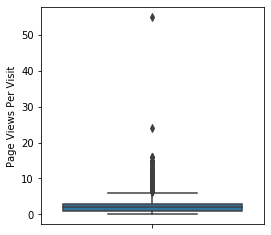

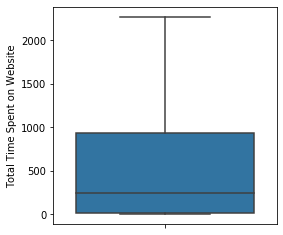

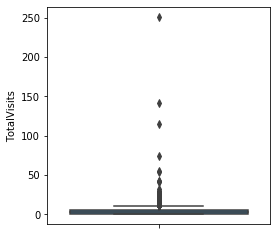

In [23]:
#Univariate Analysis of Numerical Columns
for c in numerical_column:
  num_col_univariate_analysis(c)

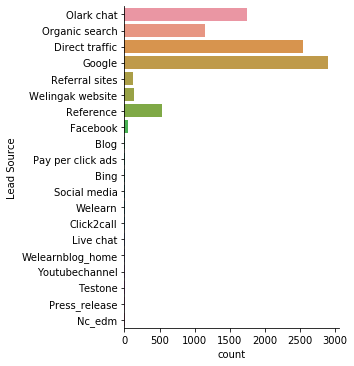

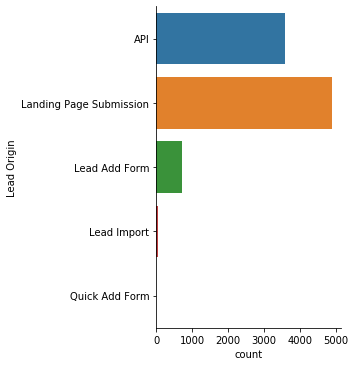

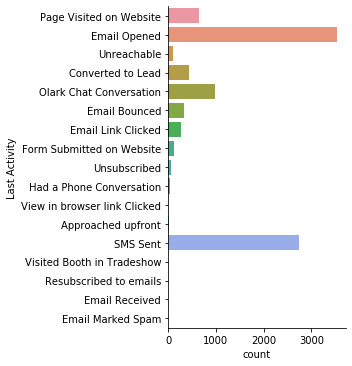

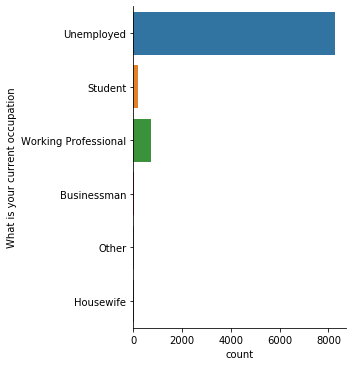

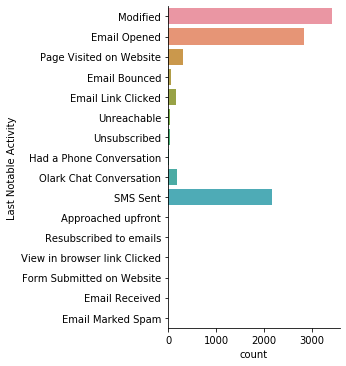

In [24]:
#Univariate Analysis of categorical Columns
for c in categorical_column:
  cat_col_univariate_analysis(c)

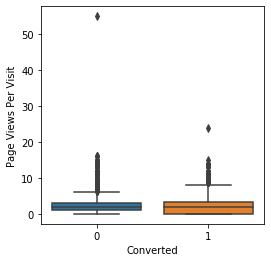

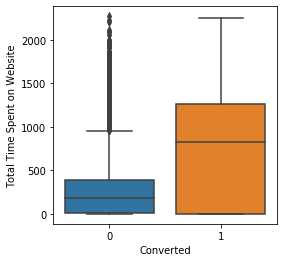

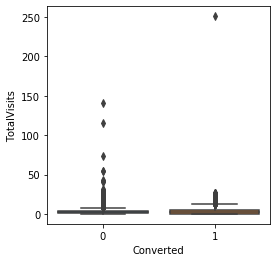

In [25]:
# Bivariate Analysis of Numerical Columns
for c in numerical_column:
  num_col_bivariate_analysis('Converted',c)

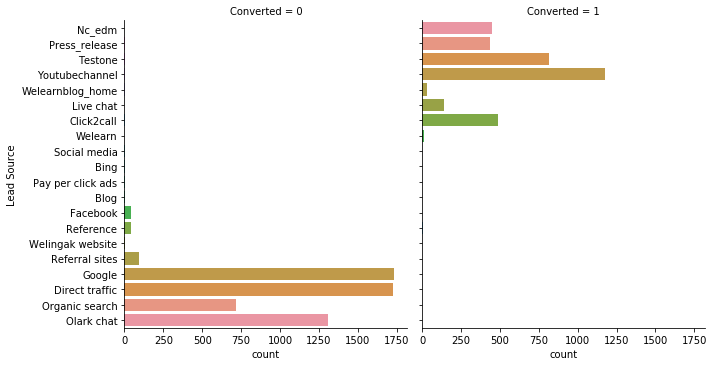

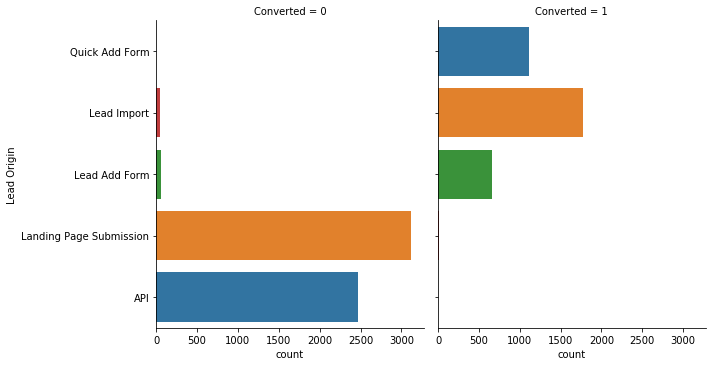

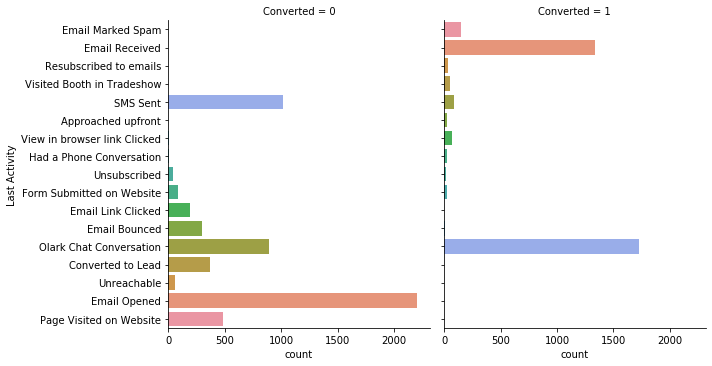

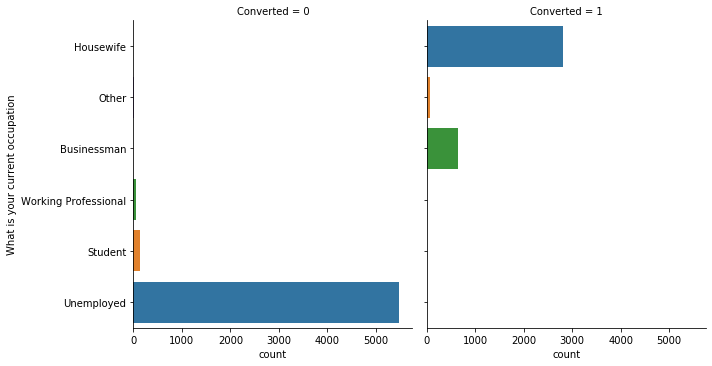

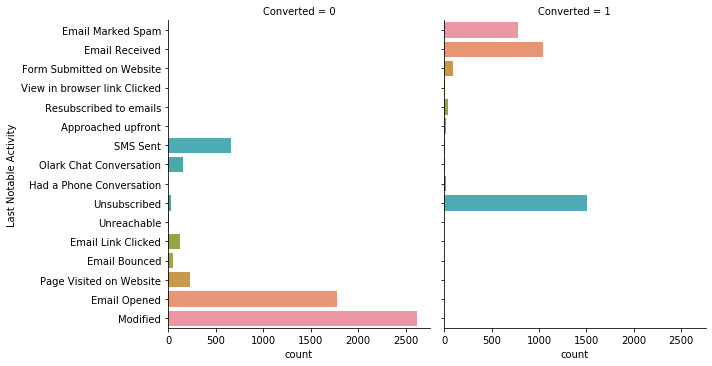

In [26]:
# Bivariate Analysis of Categorical Columns
for c in categorical_column:
  cat_col_bivariate_analysis('Converted',c)

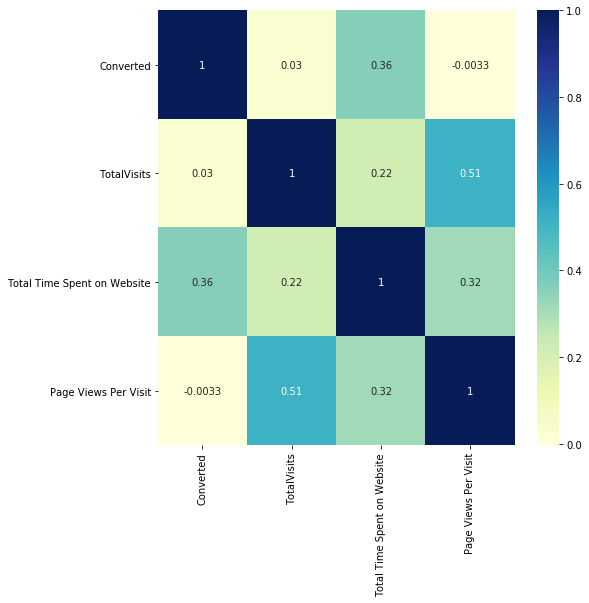

In [27]:
# Visualizing the correlation between all set of usable columns
plt.figure(figsize=(8, 8))
sns.heatmap(leads.corr(), cmap="YlGnBu",annot=True)

**Summary**: Upon observing numerous plots above , we conclude the following points:

1.   Univariate Analysis Conclusion:
    *   There is low variation in *Page Views Per Visit* and	*TotalVisits*	but higher variation in *Total Time Spent on Website*
    *  There are a lot of outliers in *Page Views Per Visit* and	*TotalVisits* which needs to be treated before modelling

2.   Bivariate Analysis Conclusion:
    *   There is positive correlation between *Total Time Spent on Website* and *Conversion*
    *   There is some correlation between *Conversion* and some categorical columns like *Lead Origin* and *Lead Source*
    
3.   Correlation Analysis (Heatmap) Conclusion:
    *   There is negative correlation between *Page Views Per Visit* and *Conversion*
    *   There is almost no correlation in *Page Views Per Visit* and	*TotalVisits* with *Conversion*


# Data Transformation
Assigning numerical variables to categories with **'Yes' to 1 and 'No' to 0** or **converting binary variables (Yes/No) to (1/0)**

In [28]:
# Yes : 1 , No : 0
category={"No":0,"Yes":1}    # creating dictionary for two categories

After converting the binary categories from 'Yes' to 1 and 'No' to 0, **we will use now dummy variables for mutiple levels of categories.**

### Dummy variable creation

The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [29]:
# Check the columns which are of type 'object'
temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [30]:
# Creating a dummy variables for 5 categories and dropping the first level.
dummy=pd.get_dummies(leads[['Lead Origin','Lead Source','Last Activity','What is your current occupation','Last Notable Activity']],drop_first=True)

# Adding these dummies to our original dataset
leads=pd.concat([leads,dummy],axis=1)
leads.shape

(9240, 69)

**Now, Removing duplicate columns or repeated columns !**

In [31]:
# We have created dummies for below categories hence removing the original column
duplicates=['Lead Origin','Lead Source','Last Activity','What is your current occupation','Last Notable Activity']
leads=leads.drop(duplicates,1)
leads.shape

(9240, 64)

In [32]:
# Converting some categories to numercial as they are imported as an 'Object'
varlist = ['Page Views Per Visit','TotalVisits']
leads[varlist] = leads[varlist].apply(pd.to_numeric, errors='coerce')

### Exploratory Data Analysis

In [33]:
#Defining catplot function for bivariate analysis
def bivariate_analysis(c1,c2):
  sns.catplot(col=c1 ,y=c2, data=leads, kind="count", height=2)
  plt.show()

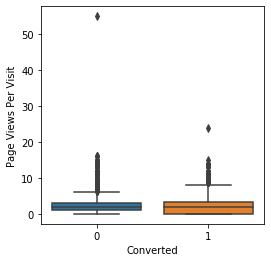

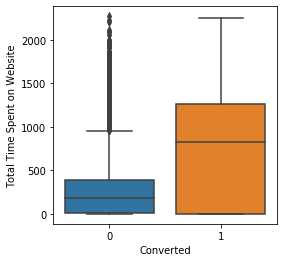

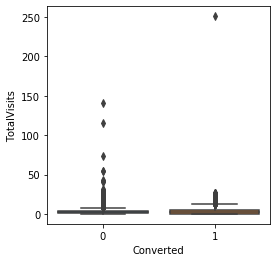

In [34]:
# Bivariate Analysis of Numerical Columns
for c in numerical_column:
  num_col_bivariate_analysis('Converted',c)


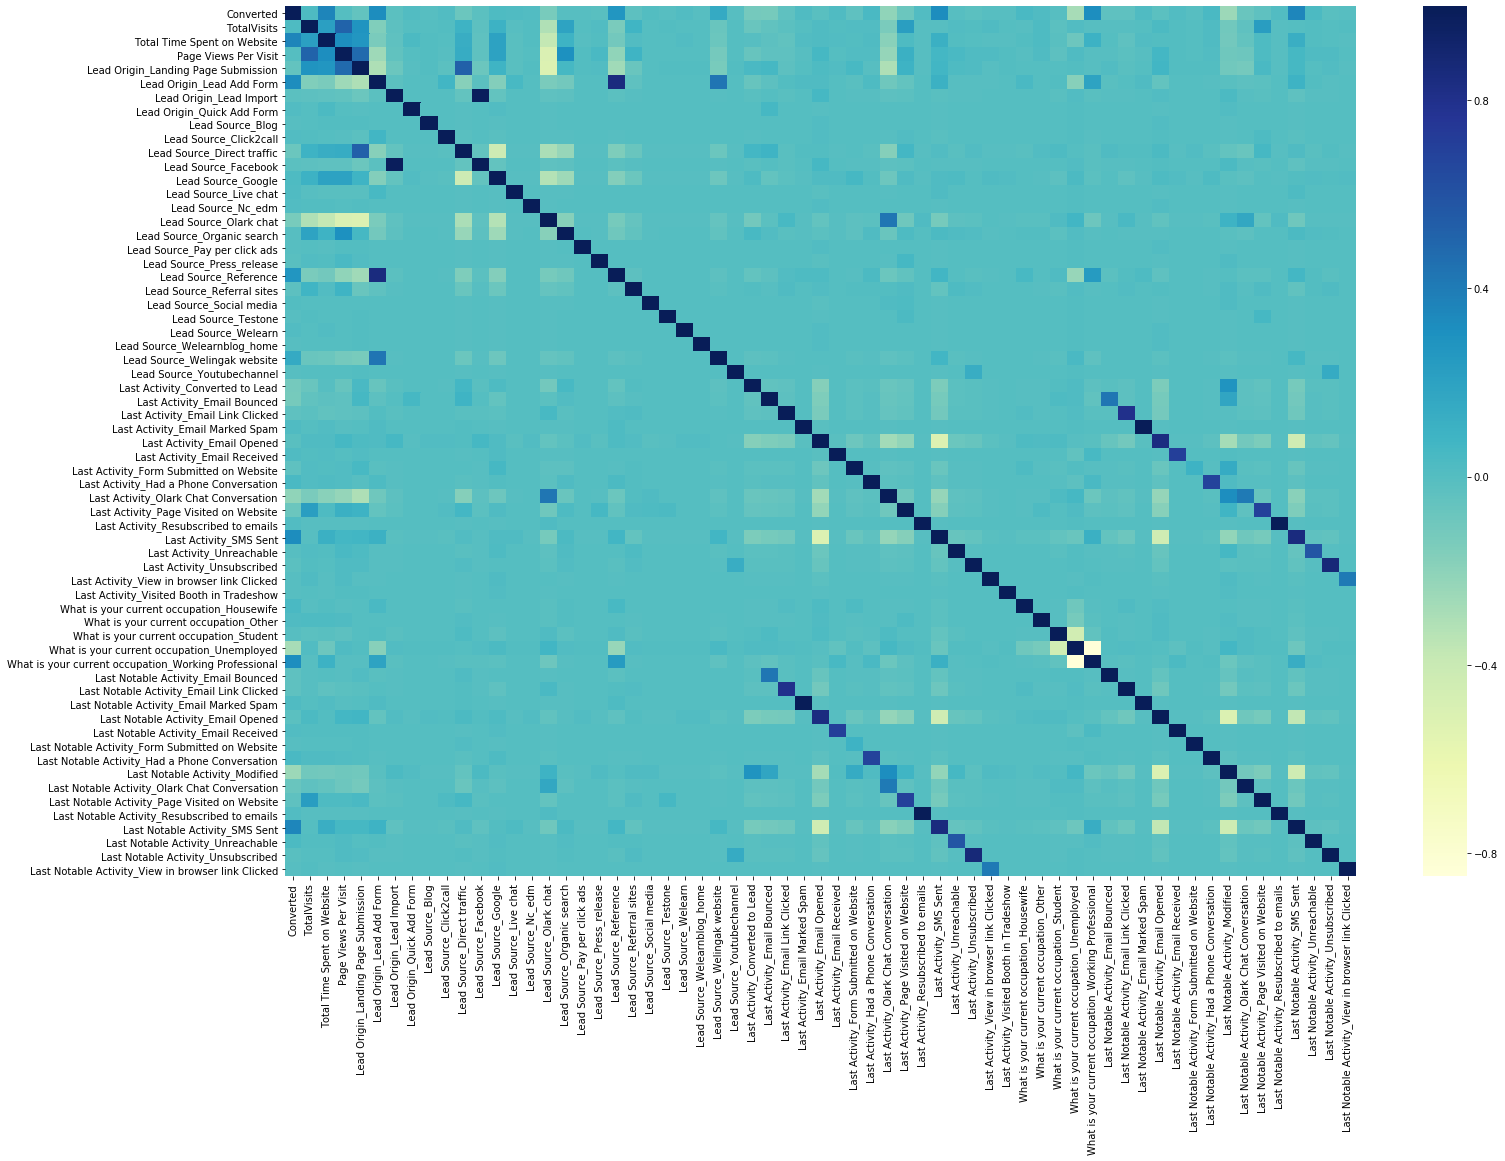

In [35]:
# Visualizing the correlation between all set of usable columns
plt.figure(figsize=(24, 16))
sns.heatmap(leads.corr(), cmap="YlGnBu")

**Note**: Upon observing numerous plots above, we conclude the following points:

1.   Bivariate Analysis Conclusion: The following dummy variables seems to have some effect on *Conversion*:
    *   Lead Origin_Lead Add Form
    *   Last Activity_Email Bounced
    *   Lead Source_Reference
    *   Total Time Spent on Website
    *   Last Activity_SMS Sent
    *   Last Notable Activity_SMS Sent
    *   What is your current occupation_Working Professional

2.   Correlation Analysis (Heatmap) Conclusion: The heatmap is not very clear due to huge number of columns, however, we do see a lot of correlation amongst columns, especially dummy variables. Hence we would further reduce the number of columns so as to reluce multicollinearity.

## Checking for Outliers

In [36]:
round(leads.describe(percentiles=[0.15,0.35,0.55,0.75,0.95]),2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,...,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00
mean,0.39,3.45,487.70,2.36,0.53,0.08,0.01,0.00,0.00,0.00,...,0.00,0.00,0.37,0.02,0.03,0.00,0.24,0.00,0.01,0.00
std,0.49,4.82,548.02,2.15,0.50,0.27,0.08,0.01,0.01,0.02,...,0.01,0.04,0.48,0.14,0.18,0.01,0.42,0.06,0.07,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
35%,0.00,2.00,98.00,1.50,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,3.00,248.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
55.0%,0.00,3.00,305.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,5.00,936.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
95%,1.00,10.00,1562.00,6.00,1.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


As we can see there are outliers in 2 variables **'TotalVisits' and 'Page Views Per Visit'**.

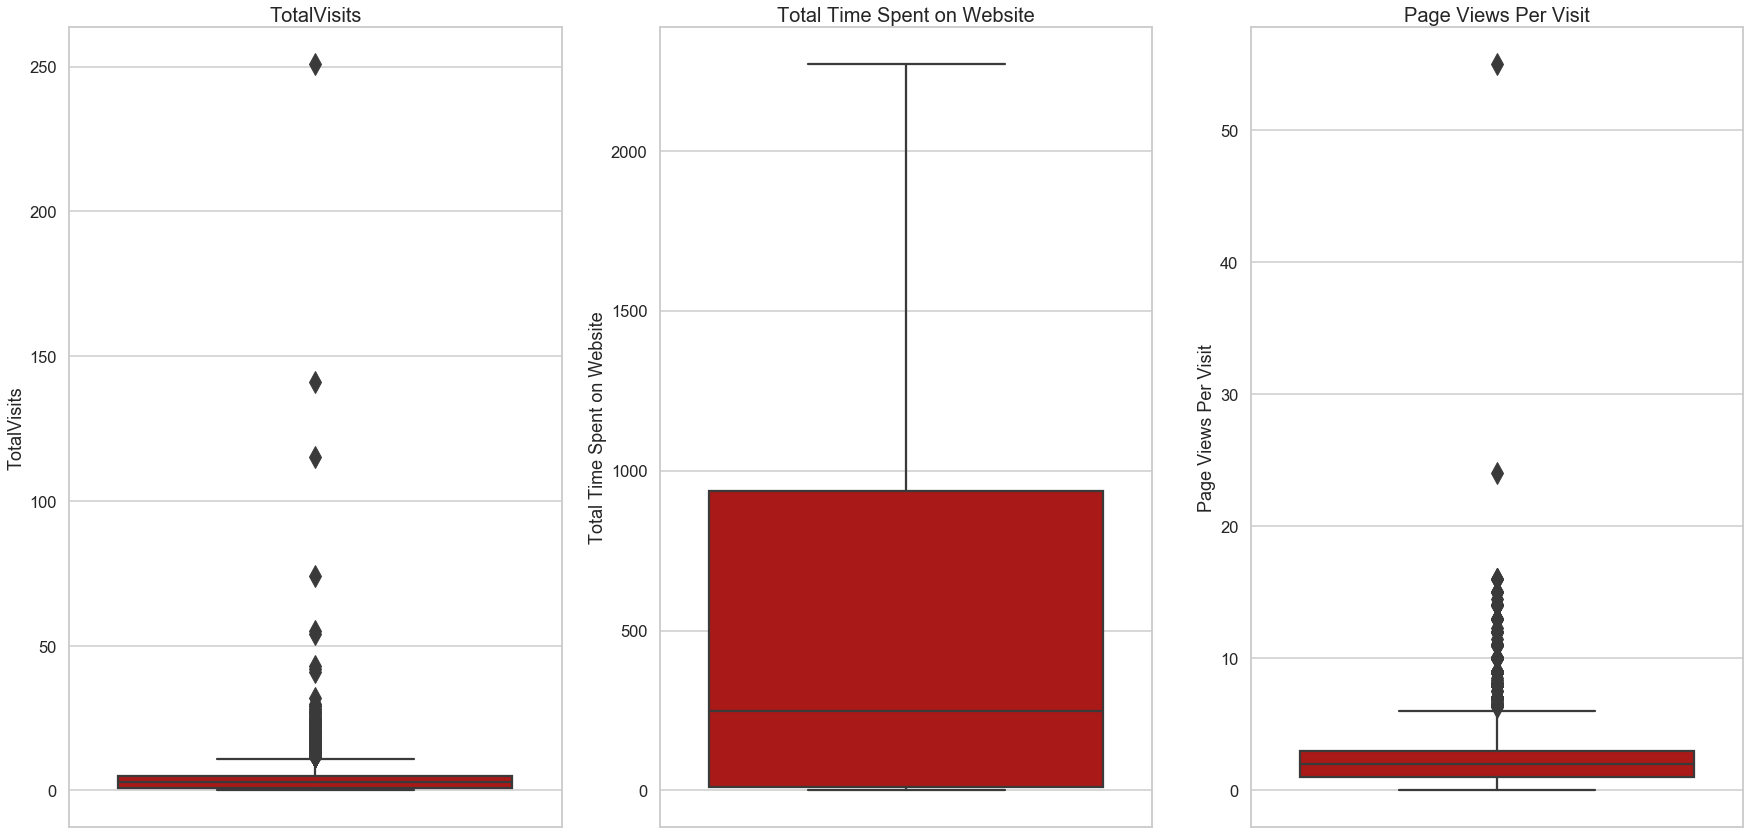

In [37]:
# Setting size of figure, context and gridlines
plt.figure(figsize=(30,50))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

# Title names for the columns in the dataset
col={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

# Visualising the outliers with boxplot for all the variables 
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col[i],fontsize=20)
    sns.boxplot(x=leads[col[i]],data=leads,palette='gist_heat',orient='v',fliersize=15)  # using boxplot  

From the above boxplots we can now confirm that we have two outlier variables in our dataset **('TotalVisits' and 'Page Views Per Visit')**. Now as per business requirement we cannot drop these outliers because it may impact our analysis/model so we will **create bins** for these two outliers.

#### Creating Bins

In [38]:
# For 'TotalVisits' variable

# As we have range from 0 to 251 for'TotalVisits' variable
ranges_total_visits={'TotalVisits_0_50': 50,'TotalVisits_50_100': 100,'TotalVisits_100_150': 150,
                     'TotalVisits_150_200' : 200,'TotalVisits_200_250': 250,'TotalVisits_250_300': 300}

# Assigning '1' or '0' to each bins
for i in range(len(list(ranges_total_visits.keys()))):
    leads[list(ranges_total_visits.keys())[i]]=leads['TotalVisits'].map(lambda x: 1 if (x < list(ranges_total_visits.values())[i] and x >= (list(ranges_total_visits.values())[i] - 50)) else 0)

In [39]:
# For 'Page Views Per Visit' variable

# As we have range from 0 to 55 for'Page Views Per Visit' variable

ranges_total_visits_1={'Page Views Per Visit_0_10': 10,'Page Views Per Visit_10_20': 20,'Page Views Per Visit_20_30': 30,
                     'Page Views Per Visit_30_40' : 40,'Page Views Per Visit_40_50': 50,'Page Views Per Visit_50_60': 60}

# Assigning '1' or '0' to each bins
for i in range(len(list(ranges_total_visits_1.keys()))):
    leads[list(ranges_total_visits_1.keys())[i]]=leads['Page Views Per Visit'].map(lambda x: 1 if (x < list(ranges_total_visits_1.values())[i] and x >= (list(ranges_total_visits_1.values())[i] - 10)) else 0)

From above, creating bins surely removed the outliers and hence we are now good to go.<br> Before going to another step let's remove redundant columns/varaibles.
<br>As we could see there are no values in the below ranges(TotalVisits_150_200','TotalVisits_200_250','Page Views Per Visit_30_40','Page Views Per Visit_40_50')

In [40]:
redundant=['TotalVisits','Page Views Per Visit','TotalVisits_150_200','TotalVisits_200_250','Page Views Per Visit_30_40','Page Views Per Visit_40_50']
leads=leads.drop(redundant,axis=1)

In [41]:
leads.head()

,Prospect ID,Converted,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,674,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,1532,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,305,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,1428,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [42]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                             0.0
Converted                                               0.0
Total Time Spent on Website                             0.0
Lead Origin_Landing Page Submission                     0.0
Lead Origin_Lead Add Form                               0.0
Lead Origin_Lead Import                                 0.0
Lead Origin_Quick Add Form                              0.0
Lead Source_Blog                                        0.0
Lead Source_Click2call                                  0.0
Lead Source_Direct traffic                              0.0
Lead Source_Facebook                                    0.0
Lead Source_Google                                      0.0
Lead Source_Live chat                                   0.0
Lead Source_Nc_edm                                      0.0
Lead Source_Olark chat                                  0.0
Lead Source_Organic search                              0.0
Lead Source_Pay per click ads           

## Data Modelling

## Train-Test Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# Putting feature variable to X
X = leads.drop(['Prospect ID','Converted'],axis=1)
X.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,674,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1532,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,305,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1428,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [45]:
# Putting response variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [46]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Considering 70% dataset in the train dataset and 30% of dataset in test data !

## Feature Scaling

In [47]:
# Importing Standard Scaler method from sklearn - preprocessing library
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()  # Creating an object

In [48]:
# Now, Scaling the 'Total Time Spent on Website' variables with standard scaler and fitting - tranforming the X - train dataset
X_train[['Total Time Spent on Website']]=scaler.fit_transform(X_train[['Total Time Spent on Website']])
X_train.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
1871,-0.885371,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6795,0.005716,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3516,-0.691418,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8105,1.365219,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3934,-0.885371,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [49]:
#Checking the conversion rate from 'converted' column as it denotes the target variable
(sum(y)/len(y.index))*100

38.53896103896104

We have conversion rate of almost 39%

### Correlation of the dataset

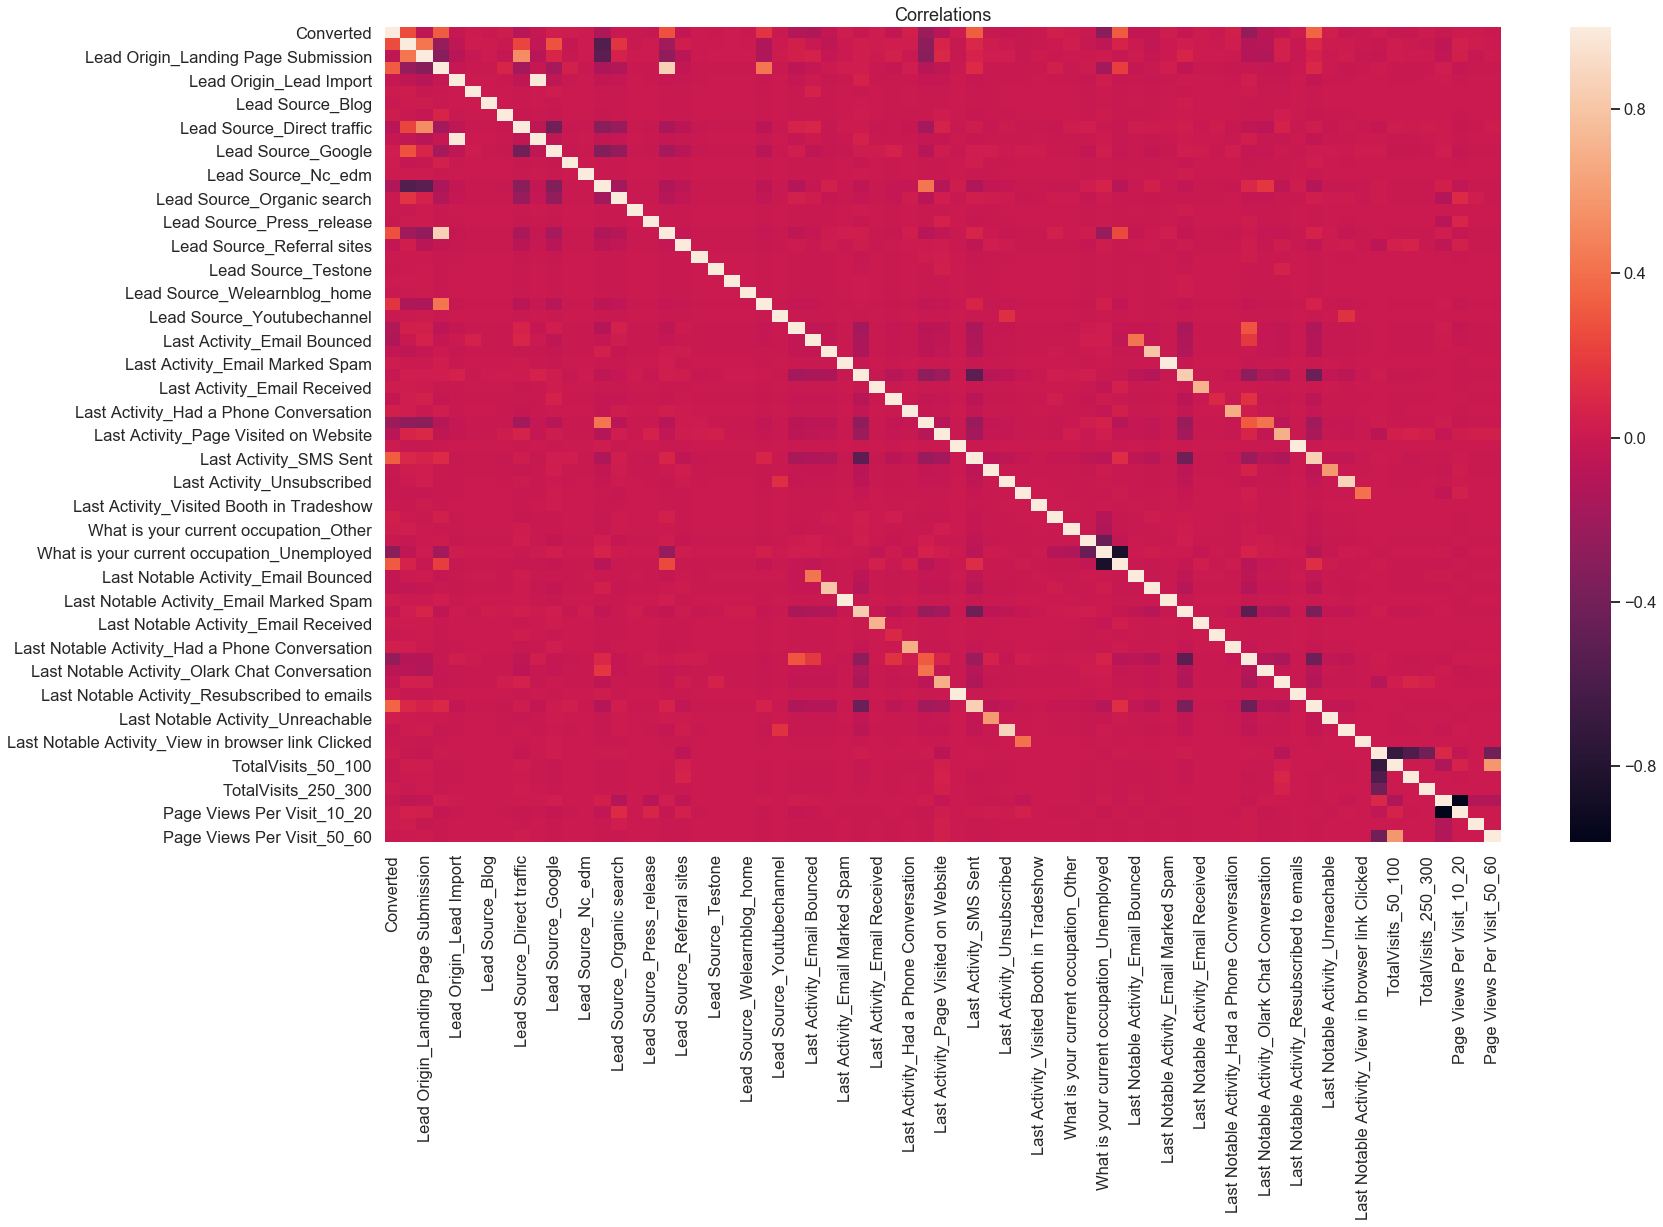

In [50]:
# setting the figure size
plt.figure(figsize=(25,15))

# setting the title
plt.title('Correlations')

# Plotting a heatmap
sns.heatmap(leads.corr(method='spearman'))
plt.show()

From the above heatmap, we saw that there are two variables having high correlation, so we going to drop them.

In [51]:
# Dropping highly correlated variables
corr_dummy=['Lead Source_Olark chat','What is your current occupation_Unemployed']
X_train=X_train.drop(corr_dummy,1)      # dropping from X train set
X_test=X_test.drop(corr_dummy,1)       # dropping from X test set

### Checking for the correlation for Training dataset

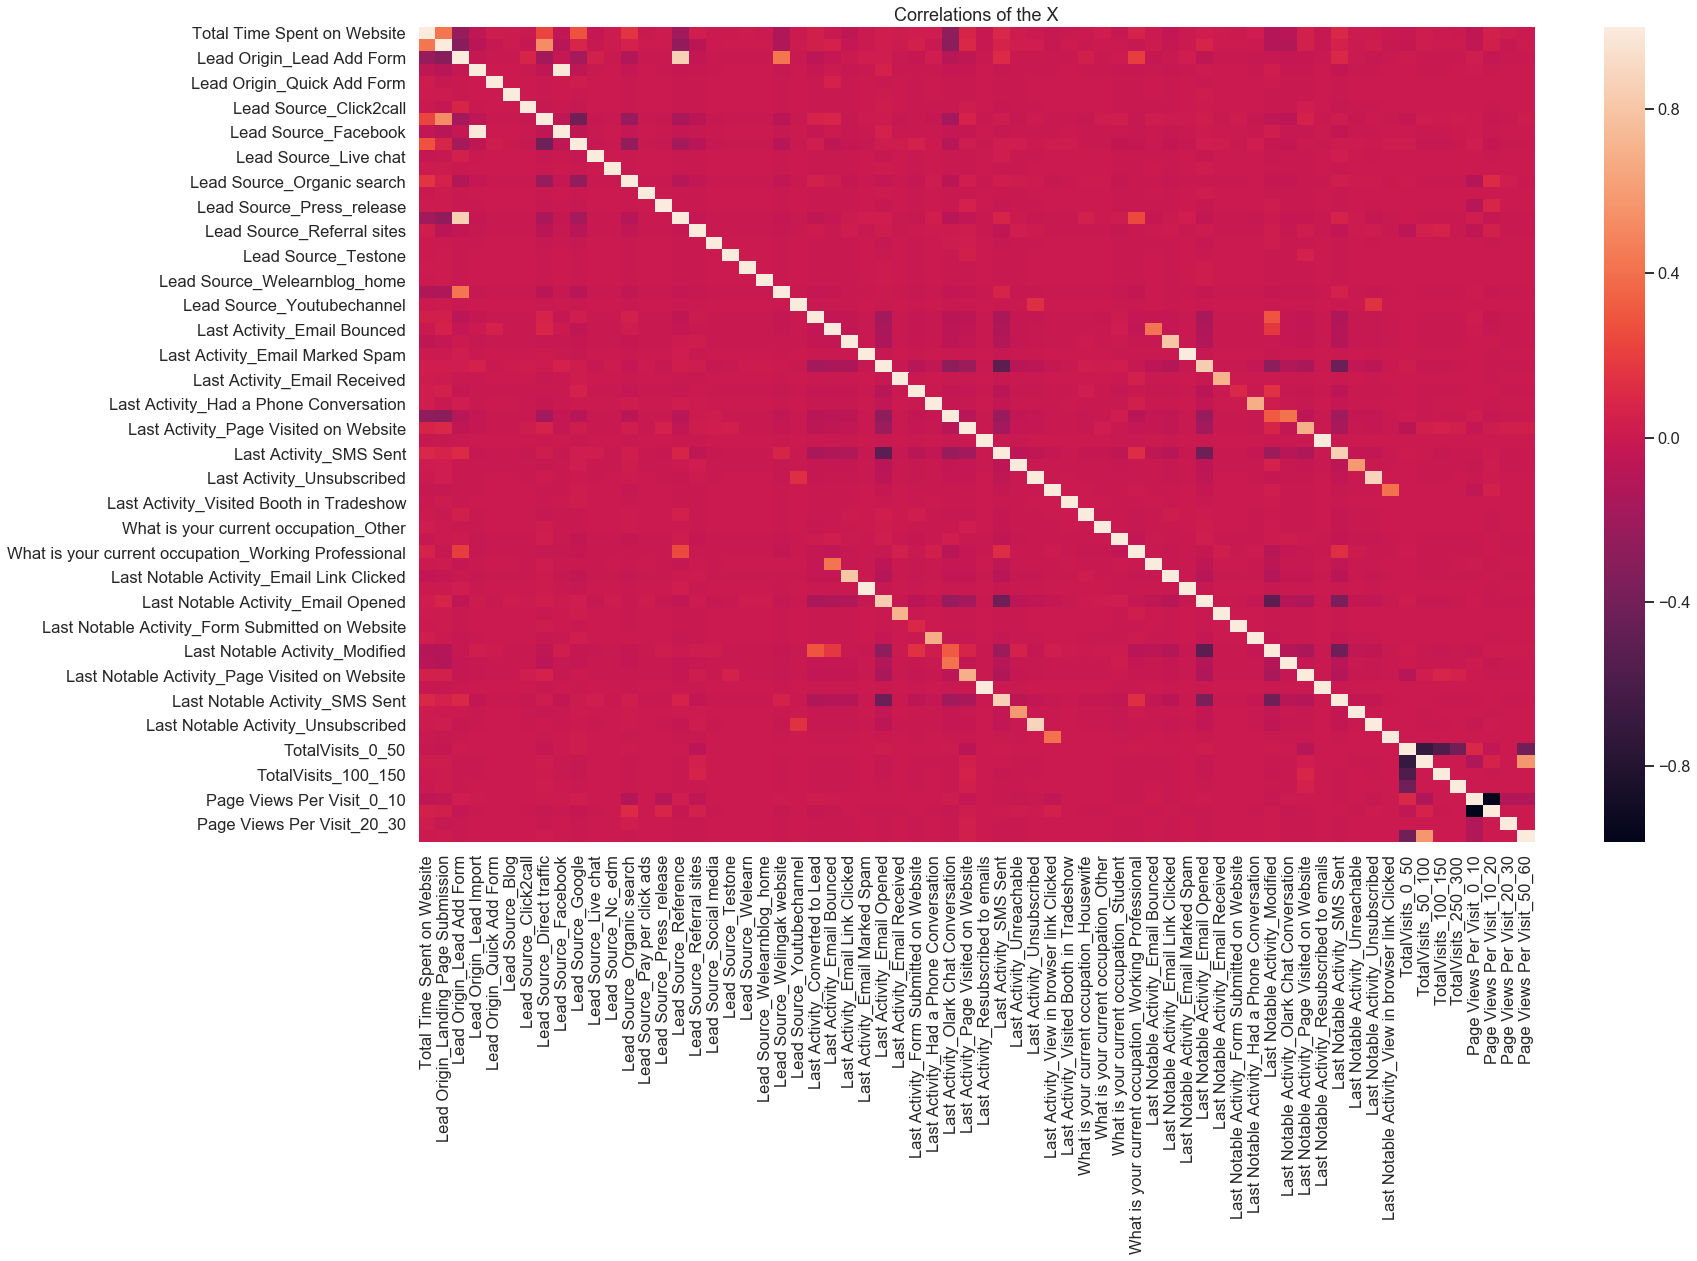

In [52]:
# setting the figure size
plt.figure(figsize=(25,15))

# setting the title
plt.title('Correlations of the X')

# Plotting a heatmap
sns.heatmap(leads[X_train.columns].corr(method='spearman'))
plt.show()

We will now proceed with building our model based on the p-values and VIFs, we will again check for correlation as from above heatmap it is difficult to spot the highly correlated variables.

# Model Building

## Using RFE - Recursive Feature Selection

In [53]:
# Importing necessary libraries
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg=LogisticRegression()                 # creating an object

In [54]:
# Running rfe for 19 variables
rfem = RFE(logreg,19)
rfem = rfem.fit(X_train,y_train)   # fitting 

In [55]:
# checking for true and false assigned to the variables after rfe
rfem.support_ 

array([ True, False,  True, False, False, False, False,  True,  True,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False])

## Model I

In [56]:
# selecting columns only which are 'True' in rfem.support_ i.e True columns were selected for creating a model
col=X_train.columns[rfem.support_]
X_train_1=sm.add_constant(X_train[col])    # Adding constant

In [57]:
# creating 1st model after RFE

logis1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())
reg1=logis1.fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2702.3
Date:                Sat, 18 Jul 2020   Deviance:                       5404.6
Time:                        11:17:49   Pearson chi2:                 7.57e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2847      0.088     -3.236      0.001      -0.457      -0.112
Total Time Spent on Website                              1.0947      0.039     28.095      0.000       1.018       1.171
Lead Origin_Lead Add Form                                2.6337      0.194     13.560      0.000       2.253       3.014
Lead Source_Direct traffic                              -1.3822      0.114    -12.102      0.000      -1.606      -1.158
Lead Source_Facebook                                    -1.2037      0.524     -2.299      0.021      -2.230      -0.178
Lead Source_Google                                      -0.9635      0.107     -8.982      0.000      -1.174      -0.753
Lead Source_Organic search                              -1.1463      0.132     -8.663      0.000      -1.406      -0.887
Lead Source_Referral sites                              -1.2236      0.313     -3.904      0.000      -1.838      -0.609
Lead Source_Welingak website                             1.7993      0.742      2.424      0.015       0.345       3.254
Last Activity_Converted to Lead                         -1.1903      0.218     -5.469      0.000      -1.617      -0.764
Last Activity_Email Bounced                             -2.3694      0.374     -6.338      0.000      -3.102      -1.637
Last Activity_Had a Phone Conversation                   0.3803      0.911      0.417      0.676      -1.405       2.166
Last Activity_Olark Chat Conversation                   -1.3948      0.163     -8.576      0.000      -1.714      -1.076
What is your current occupation_Housewife               22.9515   1.36e+04      0.002      0.999   -2.66e+04    2.67e+04
What is your current occupation_Working Professional     2.8296      0.188     15.073      0.000       2.462       3.198
Last Notable Activity_Email Bounced                      1.5941      0.593      2.689      0.007       0.432       2.756
Last Notable Activity_Had a Phone Conversation           3.2061      1.432      2.239      0.025       0.400       6.012
Last Notable Activity_SMS Sent                           1.4544      0.079     18.474      0.000       1.300       1.609
Last Notable Activity_Unreachable                        1.7651      0.511      3.451      0.001       0.763       2.768
TotalVisits_250_300                                     25.1040   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
========================================================================================================================
"""

Now, From the above summary presented there are some features having high p -values, we will drop features which is having insignificant values one by one and create new model again and again until all the features attain significant p- value.


## Calculating VIF for Model I

In [58]:
# importing VIFs library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# Creating vif dataframe
vif=pd.DataFrame()

# adding same features as the x_train dataset have
vif['Features']=X_train_1[col].columns  

# Calculating VIFs
vif['VIF']=[variance_inflation_factor(X_train_1[col].values,i) for i in range(X_train_1[col].shape[1])]

# Rounding the vif values
vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values
vif=vif.sort_values(by='VIF',ascending=False)

vif   # Viewing the dataset

,Features,VIF
10,Last Activity_Had a Phone Conversation,2.02
15,Last Notable Activity_Had a Phone Conversation,2.01
1,Lead Origin_Lead Add Form,1.41
16,Last Notable Activity_SMS Sent,1.38
9,Last Activity_Email Bounced,1.27
4,Lead Source_Google,1.24
7,Lead Source_Welingak website,1.24
2,Lead Source_Direct traffic,1.23
14,Last Notable Activity_Email Bounced,1.21
13,What is your current occupation_Working Profes...,1.18


**As we can see that all features are having vif values less than 5, hence there is no multicollinearity issue in the dataset.**

As expained before we will drop the highest in-significant features i.e **'What is your current occupation_Housewife'** having 0.999 p - value.

## Model II

In [60]:
# Dropping the most insignificant values ('What is your current occupation_Housewife') and constant
X_train_2=X_train_1.drop(['const','What is your current occupation_Housewife'],1)

In [61]:
# Creating a new model
X_train_2=sm.add_constant(X_train_2)                              # Adding constant
logis2=sm.GLM(y_train,X_train_2,families=sm.families.Binomial())  # Using GLM, creating model
reg2=logis2.fit()                                                 # Fitting our model
reg2.summary()                                                    # Showing the summary of the model created

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Gaussian   Df Model:                           18
Link Function:               identity   Scale:                         0.13913
Method:                          IRLS   Log-Likelihood:                -2789.5
Date:                Sat, 18 Jul 2020   Deviance:                       897.23
Time:                        11:17:50   Pearson chi2:                     897.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4104      0.013     31.391      0.000       0.385       0.436
Total Time Spent on Website                              0.1865      0.005     36.017      0.000       0.176       0.197
Lead Origin_Lead Add Form                                0.3874      0.022     17.657      0.000       0.344       0.430
Lead Source_Direct traffic                              -0.2015      0.016    -12.832      0.000      -0.232      -0.171
Lead Source_Facebook                                    -0.1694      0.066     -2.563      0.010      -0.299      -0.040
Lead Source_Google                                      -0.1340      0.015     -8.901      0.000      -0.164      -0.105
Lead Source_Organic search                              -0.1673      0.018     -9.069      0.000      -0.203      -0.131
Lead Source_Referral sites                              -0.1836      0.041     -4.502      0.000      -0.264      -0.104
Lead Source_Welingak website                             0.1821      0.044      4.187      0.000       0.097       0.267
Last Activity_Converted to Lead                         -0.1327      0.023     -5.852      0.000      -0.177      -0.088
Last Activity_Email Bounced                             -0.1970      0.028     -7.158      0.000      -0.251      -0.143
Last Activity_Had a Phone Conversation                   0.0552      0.113      0.489      0.625      -0.166       0.277
Last Activity_Olark Chat Conversation                   -0.1735      0.017    -10.032      0.000      -0.207      -0.140
What is your current occupation_Working Professional     0.3470      0.018     19.150      0.000       0.312       0.383
Last Notable Activity_Email Bounced                      0.0870      0.065      1.342      0.180      -0.040       0.214
Last Notable Activity_Had a Phone Conversation           0.4266      0.159      2.678      0.007       0.114       0.739
Last Notable Activity_SMS Sent                           0.2547      0.011     22.161      0.000       0.232       0.277
Last Notable Activity_Unreachable                        0.3046      0.082      3.730      0.000       0.145       0.465
TotalVisits_250_300                                      0.9395      0.373      2.518      0.012       0.208       1.671
========================================================================================================================
"""

Again, we can see from above summary that variable **'Last Activity_Had a Phone Conversation'** is in-significant hence dropping it and recreating a new model

In [62]:
# Dropping the most insignificant values ('Last Activity_Had a Phone Conversation') and constant
X_train_3=X_train_2.drop(['const','Last Activity_Had a Phone Conversation'],1)

## Model III

In [63]:
# Recreating a new model
X_train_3=sm.add_constant(X_train_3)                                # Adding constant
logis3=sm.GLM(y_train,X_train_3,families=sm.families.Binomial())    # Using GLM, creating model
reg3=logis3.fit()                                                   # Fitting our model
reg3.summary()                                                      # Showing the summary of the model created

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Gaussian   Df Model:                           17
Link Function:               identity   Scale:                         0.13911
Method:                          IRLS   Log-Likelihood:                -2789.7
Date:                Sat, 18 Jul 2020   Deviance:                       897.26
Time:                        11:17:50   Pearson chi2:                     897.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4104      0.013     31.403      0.000       0.385       0.436
Total Time Spent on Website                              0.1865      0.005     36.031      0.000       0.176       0.197
Lead Origin_Lead Add Form                                0.3878      0.022     17.689      0.000       0.345       0.431
Lead Source_Direct traffic                              -0.2015      0.016    -12.832      0.000      -0.232      -0.171
Lead Source_Facebook                                    -0.1695      0.066     -2.564      0.010      -0.299      -0.040
Lead Source_Google                                      -0.1340      0.015     -8.902      0.000      -0.164      -0.105
Lead Source_Organic search                              -0.1672      0.018     -9.065      0.000      -0.203      -0.131
Lead Source_Referral sites                              -0.1831      0.041     -4.491      0.000      -0.263      -0.103
Lead Source_Welingak website                             0.1818      0.043      4.179      0.000       0.097       0.267
Last Activity_Converted to Lead                         -0.1328      0.023     -5.859      0.000      -0.177      -0.088
Last Activity_Email Bounced                             -0.1972      0.028     -7.164      0.000      -0.251      -0.143
Last Activity_Olark Chat Conversation                   -0.1736      0.017    -10.039      0.000      -0.207      -0.140
What is your current occupation_Working Professional     0.3475      0.018     19.198      0.000       0.312       0.383
Last Notable Activity_Email Bounced                      0.0870      0.065      1.342      0.179      -0.040       0.214
Last Notable Activity_Had a Phone Conversation           0.4816      0.113      4.274      0.000       0.261       0.703
Last Notable Activity_SMS Sent                           0.2544      0.011     22.160      0.000       0.232       0.277
Last Notable Activity_Unreachable                        0.3045      0.082      3.728      0.000       0.144       0.465
TotalVisits_250_300                                      0.9395      0.373      2.518      0.012       0.208       1.671
========================================================================================================================
"""

Again, from above summary we can see that one variable **'Last Notable Activity_Email Bounced'** is insignificant hence dropping from the dataset.

## Model IV

In [64]:
# Dropping the most insignificant values ('Last Notable Activity_Email Bounced') and constant
X_train_4=X_train_3.drop(['const','Last Notable Activity_Email Bounced'],1)

In [65]:
# Recreating a new model
X_train_4=sm.add_constant(X_train_4)                              # Adding constant
logis4=sm.GLM(y_train,X_train_4,families=sm.families.Binomial())  # Using GLM, creating model
reg4=logis4.fit()                                                 # Fitting our model
reg4.summary()                                                    # Showing the summary of the model created

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Gaussian   Df Model:                           16
Link Function:               identity   Scale:                         0.13913
Method:                          IRLS   Log-Likelihood:                -2790.6
Date:                Sat, 18 Jul 2020   Deviance:                       897.51
Time:                        11:17:51   Pearson chi2:                     898.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4104      0.013     31.401      0.000       0.385       0.436
Total Time Spent on Website                              0.1866      0.005     36.053      0.000       0.176       0.197
Lead Origin_Lead Add Form                                0.3874      0.022     17.672      0.000       0.344       0.430
Lead Source_Direct traffic                              -0.2017      0.016    -12.842      0.000      -0.232      -0.171
Lead Source_Facebook                                    -0.1695      0.066     -2.563      0.010      -0.299      -0.040
Lead Source_Google                                      -0.1339      0.015     -8.889      0.000      -0.163      -0.104
Lead Source_Organic search                              -0.1673      0.018     -9.070      0.000      -0.203      -0.131
Lead Source_Referral sites                              -0.1826      0.041     -4.480      0.000      -0.263      -0.103
Lead Source_Welingak website                             0.1830      0.043      4.208      0.000       0.098       0.268
Last Activity_Converted to Lead                         -0.1328      0.023     -5.858      0.000      -0.177      -0.088
Last Activity_Email Bounced                             -0.1823      0.025     -7.235      0.000      -0.232      -0.133
Last Activity_Olark Chat Conversation                   -0.1735      0.017    -10.035      0.000      -0.207      -0.140
What is your current occupation_Working Professional     0.3476      0.018     19.203      0.000       0.312       0.383
Last Notable Activity_Had a Phone Conversation           0.4815      0.113      4.272      0.000       0.261       0.702
Last Notable Activity_SMS Sent                           0.2544      0.011     22.157      0.000       0.232       0.277
Last Notable Activity_Unreachable                        0.3044      0.082      3.728      0.000       0.144       0.465
TotalVisits_250_300                                      0.9397      0.373      2.518      0.012       0.208       1.671
========================================================================================================================
"""

Now, from the above summary we can see that there is still one in-significant variable present in the dataset i.e **'TotalVisits_250_300'**, hence we need to drop this variable and recreate a new model

## Model V

In [66]:
# Dropping the most insignificant values ('Last Notable Activity_Email Bounced') and constant
X_train_5=X_train_4.drop(['const','TotalVisits_250_300'],1)

In [67]:
# Recreating a new model
X_train_5=sm.add_constant(X_train_5)                              # Adding constant
logis5=sm.GLM(y_train,X_train_5,families=sm.families.Binomial())  # Using GLM, creating model
reg5=logis5.fit()                                                 # Fitting our model
reg5.summary()                                                    # Showing the summary of the model created

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Gaussian   Df Model:                           15
Link Function:               identity   Scale:                         0.13924
Method:                          IRLS   Log-Likelihood:                -2793.7
Date:                Sat, 18 Jul 2020   Deviance:                       898.39
Time:                        11:17:51   Pearson chi2:                     898.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4104      0.013     31.385      0.000       0.385       0.436
Total Time Spent on Website                              0.1864      0.005     36.007      0.000       0.176       0.197
Lead Origin_Lead Add Form                                0.3874      0.022     17.667      0.000       0.344       0.430
Lead Source_Direct traffic                              -0.2010      0.016    -12.794      0.000      -0.232      -0.170
Lead Source_Facebook                                    -0.1695      0.066     -2.563      0.010      -0.299      -0.040
Lead Source_Google                                      -0.1337      0.015     -8.874      0.000      -0.163      -0.104
Lead Source_Organic search                              -0.1672      0.018     -9.057      0.000      -0.203      -0.131
Lead Source_Referral sites                              -0.1825      0.041     -4.475      0.000      -0.262      -0.103
Lead Source_Welingak website                             0.1830      0.044      4.206      0.000       0.098       0.268
Last Activity_Converted to Lead                         -0.1332      0.023     -5.872      0.000      -0.178      -0.089
Last Activity_Email Bounced                             -0.1827      0.025     -7.247      0.000      -0.232      -0.133
Last Activity_Olark Chat Conversation                   -0.1737      0.017    -10.040      0.000      -0.208      -0.140
What is your current occupation_Working Professional     0.3475      0.018     19.192      0.000       0.312       0.383
Last Notable Activity_Had a Phone Conversation           0.4814      0.113      4.269      0.000       0.260       0.702
Last Notable Activity_SMS Sent                           0.2542      0.011     22.129      0.000       0.232       0.277
Last Notable Activity_Unreachable                        0.3042      0.082      3.723      0.000       0.144       0.464
========================================================================================================================
"""

Now, from the above summary we can say that all the variables present in this model are **significant** as no variables is having p - value greater than 5% hence we can proceed with our next step

## Creating VIF

After creating a model with no in significant features lets check the VIF i.e multicollinearity as we have checked earlier there was no such thing were found after creating VIF - all VIF vallues are less than 5 which means our **final model is ready**.

In [68]:
# Checking VIF again just to be sure
X_train_5_1=X_train_5.drop('const',1)     # dropping constant and saving in new dataset
vif=pd.DataFrame()                        # Creating new VIF DataFrame
vif['Features']=X_train_5_1.columns       # Adding final train dataset features

# Now calculating
vif['VIF']=[variance_inflation_factor(X_train_5_1.values,i) for i in range(X_train_5_1.shape[1])]

# Rounding the vif values
vif['VIF']=round(vif['VIF'],2)

# Sorting the vif dataset
vif=vif.sort_values(by='VIF',ascending=False)

vif   # viewing the dataset

,Features,VIF
1,Lead Origin_Lead Add Form,1.40
13,Last Notable Activity_SMS Sent,1.38
7,Lead Source_Welingak website,1.24
4,Lead Source_Google,1.23
2,Lead Source_Direct traffic,1.22
11,What is your current occupation_Working Profes...,1.17
0,Total Time Spent on Website,1.15
5,Lead Source_Organic search,1.10
8,Last Activity_Converted to Lead,1.10
10,Last Activity_Olark Chat Conversation,1.08


As confirmed earlier, **no sign of multicollinearity** shown from above vif dataframe hence reg5 is our final model and we are going to use it predict the X train dataset.

## Predicting a Test model

In [69]:
# Predicting the test dataset with our final model
y_train_pred=reg5.predict(X_train_5)

# Creating a new dataset and saving predicted values in it
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})
y_train_pred_final.head()   # viewing first 5 rows

,Converted,Converted_probability,ID
1871,0,0.245333,1871
6795,0,0.210520,6795
3516,0,0.281495,3516
8105,0,0.785481,8105
3934,0,0.245333,3934


## ROC Curve Plotting
- ROC curve shows the trade off between sensitivity and specificity - means if sensitivity increases specificity will decrease.
- The curve closer to the left side border then right side of the border is more accurate. 
- The curve closer to the 45-degree diagonal of the ROC space is less accurate.

In [70]:
# Importing necessary libraries for roc curve

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

# Creating a function to plot roc curve with auc score

def leads_roc( real, probability ):
    
    # Creating roc curve values like false positive rate , true positive rate and threshold
    
    fpr, tpr, thresholds = roc_curve( real, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    
    auc_score = roc_auc_score( real, probability )    
    
    # Setting the figure size
    
    plt.figure(figsize=(8, 4))
    
    # Plotting the roc curve
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the 45% dotted line 
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Setting the x axis linit
    
    plt.xlim([0.0, 1.0])
    
    # Setting the y axis limit
    
    plt.ylim([0.0, 1.05])
    
    # Setting the x axis label
    
    plt.xlabel('False Positive Rate')
    
    # Setting the y axis label
    
    plt.ylabel('True Positive Rate')
    
    # Setting the title
    
    plt.title('Receiver operating characteristic')
    
    # Setting the legend on the left below to show the value of auc    
    
    plt.legend(loc="lower right")
    
    # Showing the plot
    
    plt.show()

    return None   # no return

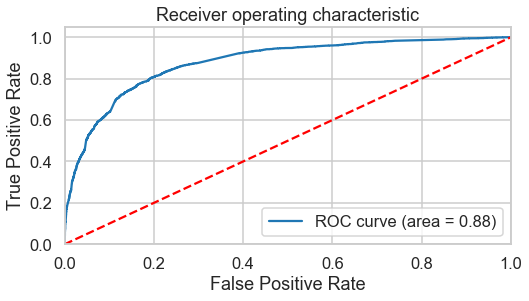

In [71]:
# Calling the roc curve for plotting

leads_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

Points to be concluded from above roc curve -
- The curve is closer to the left side of the border than to the right side hence our model is having great accuracy.
- The area under the curve is 88% of the total area.

#### Finding optimal probability cutoff point

In [72]:
# creating 10 points out of which one we will choose for our cutoff point
numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)   #  Mapping the probablities for each 10 points
y_train_pred_final.head()   # Viewing the first 5 rows

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.245333,1871,1,1,1,0,0,0,0,0,0,0
6795,0,0.210520,6795,1,1,1,0,0,0,0,0,0,0
3516,0,0.281495,3516,1,1,1,0,0,0,0,0,0,0
8105,0,0.785481,8105,1,1,1,1,1,1,1,1,0,0
3934,0,0.245333,3934,1,1,1,0,0,0,0,0,0,0


Now, after creating series of points let's check the possibilities of choosing any one points from 0 to 0.9. We will do this by finding **'Accuracy'**, **'Sensitivity'** and **'Specificity'** for each points. These three methods will tell us how our model is - whether it is having low accuray or high or number of relevance data points is high or low etc.

In [73]:
# Calculating accuracy, sensitivity and specificity with probability cutoffs

# importing necessary library

from sklearn.metrics import confusion_matrix

# Creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  # creating confusion matrix 
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(df_cutoffs)   # Printing the data

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.420686    0.995539     0.066467
0.1          0.1  0.564935    0.975669     0.311844
0.2          0.2  0.701144    0.939173     0.554473
0.3          0.3  0.785096    0.860097     0.738881
0.4          0.4  0.805195    0.788321     0.815592
0.5          0.5  0.800247    0.641119     0.898301
0.6          0.6  0.787570    0.534063     0.943778
0.7          0.7  0.748918    0.388078     0.971264
0.8          0.8  0.721243    0.295620     0.983508
0.9          0.9  0.682437    0.175182     0.995002


As we can see from the above data we have created points for accuracy , sensitivity and specificity for all probability points from 0 to 0.9.
Out of this we have to choose one as a cutoff point and it is **probability cutoff = 0.4** because all the accuracy , sensitivity and specificity are having nearly same value which is an ideal point to consider for as we can't ignore any one from three.                                                                                                                    

**Let's plot this data and see the convergent point or meeting point for all three point 'accuracy' , 'sensitivity' and 'specificity'**

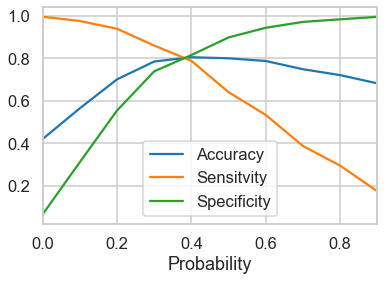

In [74]:
# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).

df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])   # line plotting
plt.show()

From the above curve, 0.4 is the optimum point for taking probability cutoff as the meeting point is slightly before from 0.4 hence final cutoff we choose is **0.40**. Also we can see that there is a trade off between sensitivity and specificity.

In [75]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final dataset
y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.4 else 0 )  # Predicted value 
y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
1871,0,0.245333,1871,1,1,1,0,0,0,0,0,0,0,0
6795,0,0.210520,6795,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.281495,3516,1,1,1,0,0,0,0,0,0,0,0
8105,0,0.785481,8105,1,1,1,1,1,1,1,1,0,0,1
3934,0,0.245333,3934,1,1,1,0,0,0,0,0,0,0,0


In [76]:
# Let's check the accuracy now
# Import metrics from sklearn for evaluation

from sklearn import metrics
from sklearn.metrics import accuracy_score  

metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)

0.8051948051948052

## Precision and Recall

Let's create precision and recall using confusion matrix for the final dataset ass we know that to attain more stability and predict successfully in our model one needs to check these two important methods which not only will tell us how our model is but also it will show us some insight like what is the score for result relevancy and how many truly relevant results are returned. 

In [77]:
# Creating confusion matrix to find precision and recall score
confusion_pr=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr

array([[3264,  738],
       [ 522, 1944]], dtype=int64)

In [78]:
# Calculate Sensitivity

# TP/(TP+FN)
confusion_pr[1,1]/(confusion_pr[1,1]+confusion_pr[1,0])

0.7883211678832117

In [79]:
# Calculate Specificity

# TN/(TN+FP)
confusion_pr[0,0]/(confusion_pr[0,0]+confusion_pr[0,1])

0.815592203898051

In [80]:
print('Precision',confusion_pr[1,1]/(confusion_pr[0,1]+confusion_pr[1,1]))    # Printing Pecision score
print('Recall',confusion_pr[1,1]/(confusion_pr[1,0]+confusion_pr[1,1]))       # Printing Recall score

Precision 0.7248322147651006
Recall 0.7883211678832117


Important point to be noted from the outcomes for precision and recall score -
- Our precison percentage is 72% approximately and recall  percentage is 79%
- This means we have very good model which explains relevancy of 72% and true relevant results about 79%.

**As per our business objective, the recall percentage I will consider more valuable because it is okay if our precision is little low which means less hot lead customers but we don't want to left out any hot leads which are willing to get converted hence our focus on this will be more on Recall than Precision.**

### Precision and Recall trade-off

As we all know that Precision and Recall are inversely related means if one increases other will genuinely decrease. Hence we need to see the trade off between these two.
Let's check that in below graph.

In [81]:
# importing precision recall curve from sklearn library

from sklearn.metrics import precision_recall_curve

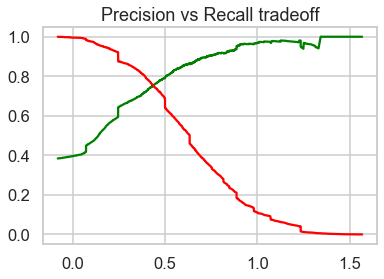

In [82]:
# Creating precision recall curve by crreating three points and plotting

p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

**As we can see that there is a trade off between Precision and Recall and the meeting point is nearly at 0.5**

## Prediction the test dataset

### Scaling the test dataset

In [83]:
# Scalling the variables 'Total Time Spent on Website' with standard scaler and tranforming the X - test dataset

X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])

### Now Predicting

In [84]:
# Predicting the test dataset with our final model

test_cols=X_train_5.columns[1:]              # Taking the same column train set has
X_test_final=X_test[test_cols]               # Updating it in the final test set
X_test_final=sm.add_constant(X_test_final)   # Adding constant to the final set set
y_pred_test=reg5.predict(X_test_final)       # Predicting the final test set

In [85]:
# Creating a new dataset and saving the prediction values in it

y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})

y_test_pred_final.head()   # viewing first 5 rows

,Converted,Converted_Probability,ID
4269,1,0.643490,4269
2376,1,0.886986,2376
7766,1,0.783532,7766
9199,0,0.071660,9199
4359,1,0.632779,4359


### Model Evaluation

In [86]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final test dataset

y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.4 else 0 )  # Predicted value 

y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
4269,1,0.643490,4269,1
2376,1,0.886986,2376,1
7766,1,0.783532,7766,1
9199,0,0.071660,9199,0
4359,1,0.632779,4359,1


In [87]:
# Checking the accuracy of the test dataset.

from sklearn import metrics    # Imprting metrics from sklearn

print('Accuracy score in predicting test dataset :',metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))   # Printing the score

Accuracy score in predicting test dataset : 0.810966810966811


In [88]:
from sklearn.metrics import precision_score, recall_score     # Importing precision and recall score from sklearn

print('Precision score in predicting test dataset:',precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))   # Printing the precision score

print('Recall score in predicting test dataset:',recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))      # Printing the recall score

Precision score in predicting test dataset: 0.751099384344767
Recall score in predicting test dataset: 0.7799086757990867


## Lead Score assigning

In [89]:
# Creating new columns for lead number and lead score
# y_test_pred_final['Lead Number']=leads.iloc[y_test_pred_final['ID'],1]
y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))
y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted,Lead Score
4269,1,0.643490,4269,1,64
2376,1,0.886986,2376,1,89
7766,1,0.783532,7766,1,78
9199,0,0.071660,9199,0,7
4359,1,0.632779,4359,1,63


Insights -
 - The Accuracy, Precision and Recall score we got from test set in acceptable range.
 - We have high recall score than precision score which we were exactly looking for.
 - In business terms, this model has an ability to adjust with the company’s requirements in coming future.
 - This concludes that the model is in stable state.
 - Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a        lead getting converted are :
    - **Last Notable Activity_Had a Phone Conversation**
    - **Lead Origin_Lead Add Form** and
    - **What is your current occupation_Working Professional**